In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import random
import shutil
import time

from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf

In [3]:
# Starter code to download small files
# Use this to download your starter CSV in notebook one and two.
# Also use it to download your thumbnails.zip in notebook two.
def download_if_missing(url, target, extract=True):
  if os.path.exists(target):
    return target
  return tf.keras.utils.get_file(target, origin=url, extract=extract)

In [4]:
colab_root = "/content/"

In [5]:
csv_path = os.path.join(colab_root, "starter2.csv")
download_if_missing("https://storage.googleapis.com/applied-dl/mini-vqa/starter2.csv",
                     csv_path)

1329146/1329146 [==============================] - 0s 0us/step


'/content/starter2.csv'

In [6]:
YOUR_THUMBNAILS_URL = "https://storage.googleapis.com/daelim_bucket2/thumbnails.zip"

In [7]:
thumbnails_file = os.path.join(colab_root, "thumbnails.zip")
images_folder = os.path.join(colab_root, 'thumbnails/')
download_if_missing(YOUR_THUMBNAILS_URL,
                    thumbnails_file,
                    extract=False)

267491320/267491320 [==============================] - 11s 0us/step


'/content/thumbnails.zip'

In [8]:
!unzip -q $thumbnails_file -d $images_folder

In [9]:
!ls $images_folder

Streaming output truncated to the last 5000 lines.
COCO_train2014_000000141695.jpg  COCO_train2014_000000430061.jpg
COCO_train2014_000000141702.jpg  COCO_train2014_000000430065.jpg
COCO_train2014_000000141710.jpg  COCO_train2014_000000430086.jpg
COCO_train2014_000000141712.jpg  COCO_train2014_000000430094.jpg
COCO_train2014_000000141718.jpg  COCO_train2014_000000430142.jpg
COCO_train2014_000000141785.jpg  COCO_train2014_000000430149.jpg
COCO_train2014_000000141825.jpg  COCO_train2014_000000430166.jpg
COCO_train2014_000000141842.jpg  COCO_train2014_000000430192.jpg
COCO_train2014_000000141848.jpg  COCO_train2014_000000430193.jpg
COCO_train2014_000000141850.jpg  COCO_train2014_000000430205.jpg
COCO_train2014_000000141855.jpg  COCO_train2014_000000430249.jpg
COCO_train2014_000000141857.jpg  COCO_train2014_000000430281.jpg
COCO_train2014_000000141860.jpg  COCO_train2014_000000430285.jpg
COCO_train2014_000000141874.jpg  COCO_train2014_000000430315.jpg
COCO_train2014_000000141922.jpg  COCO_t

In [10]:
# Your code here
# Write code to verify you can find every image mentioned in the starter 
# CSV on disk. For example, you may want write a loop like this:
thumbnails = "thumbnails"
import csv
with open('starter2.csv') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for row in reader:
       question, answer, image = row
       image = image.strip()
       assert os.path.exists(os.path.join(thumbnails, image))

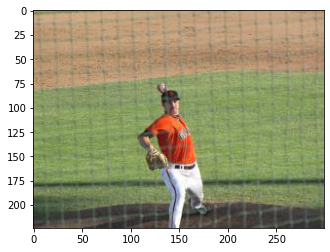

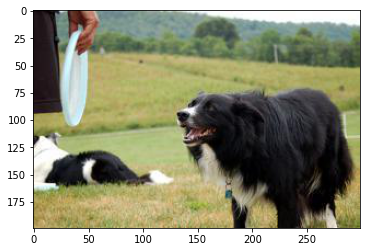

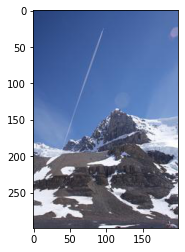

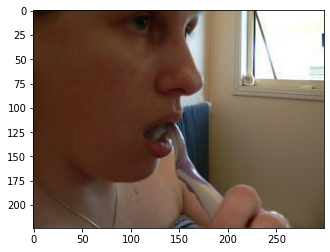

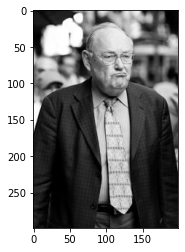

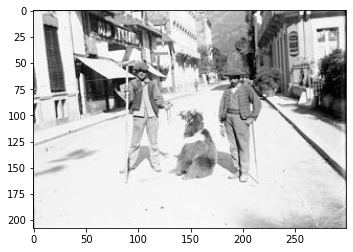

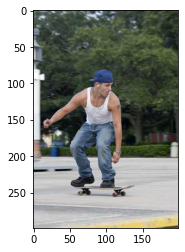

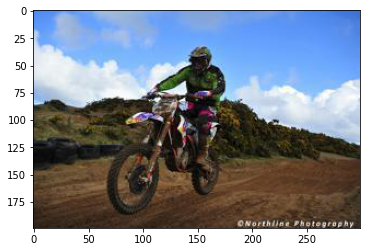

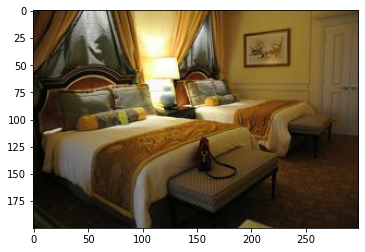

In [11]:
import csv 


thumbnails_file = "thumbnails"
with open('starter2.csv') as myfile:
  reader = csv.reader(myfile, delimiter =',')
  i = 0
  for row in reader:
    question, answer, image = row
    image_path = os.path.join(thumbnails_file, image)
    #image = Image.open(image_path)
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.show()
    i += 1
    if i == 9:
      break

In [12]:
!head $csv_path -n3 # take a look at a few rows

is this man a professional baseball player,yes,COCO_train2014_000000458752.jpg
is the dog waiting,yes,COCO_train2014_000000524291.jpg
is the sky blue,yes,COCO_train2014_000000393221.jpg


In [13]:
!wc -l $csv_path

20000 /content/starter2.csv


In [14]:
# Your code here
# Convert the answers column in the starter CSV to 1.0 and 0.0
# You do not need to update the CSV itself. If you have a data structure
# in memory, you can work with that instead.
import pandas as pd
df = pd.read_csv("starter2.csv", header = None)
print(df)

                                                 0    1  \
0       is this man a professional baseball player  yes   
1                               is the dog waiting  yes   
2                                  is the sky blue  yes   
3                               is the window open  yes   
4                               is the man smiling   no   
...                                            ...  ...   
19995  could a person lift the object in the image   no   
19996            are all of the computers the same   no   
19997                       is she taking a selfie   no   
19998            is the person climbing a mountain   no   
19999       does the table have a tablecloth on it   no   

                                     2  
0      COCO_train2014_000000458752.jpg  
1      COCO_train2014_000000524291.jpg  
2      COCO_train2014_000000393221.jpg  
3      COCO_train2014_000000393223.jpg  
4      COCO_train2014_000000393224.jpg  
...                                ...  
1999

In [15]:
df.columns = ['question', 'answer', 'image']

In [16]:

#df['answer'].replace(to_replace=['no', 'yes'], value=[0, 1])
df['answer'] = df['answer'].map({'yes': 1.0, 'no': 0.0})

In [17]:
df.head(10)

,question,answer,image
0,is this man a professional baseball player,1.0,COCO_train2014_000000458752.jpg
1,is the dog waiting,1.0,COCO_train2014_000000524291.jpg
2,is the sky blue,1.0,COCO_train2014_000000393221.jpg
3,is the window open,1.0,COCO_train2014_000000393223.jpg
4,is the man smiling,0.0,COCO_train2014_000000393224.jpg
5,judging from the dress was this taken in a lat...,1.0,COCO_train2014_000000524297.jpg
6,does the guy have a tattoo,1.0,COCO_train2014_000000393227.jpg
7,is the man riding on a dirt path,1.0,COCO_train2014_000000131084.jpg
8,are the walls done in a summery color,1.0,COCO_train2014_000000131074.jpg
9,is there a shadow of a tree in the foreground,0.0,COCO_train2014_000000393230.jpg


In [18]:
# Your code here
# Shuffle the starter CSV
# Remove 4,000 rows (or so) and move them to a separate file or data structure
ds = df.sample(frac = 1)
ds = ds.head(4000)

In [19]:
ds.to_csv('test_set.csv')

In [20]:
# Your code here
# The scikit-learn utilities (train_test_split) are your friend
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [21]:
train

,question,answer,image
17657,is there a wheelchair ramp,0.0,COCO_train2014_000000094210.jpg
10124,are all of these umbrellas identical,0.0,COCO_train2014_000000415146.jpg
4671,are the birds wings fully extended,0.0,COCO_train2014_000000271622.jpg
15350,is the man going down a hill,0.0,COCO_train2014_000000267969.jpg
225,does this food look burnt,1.0,COCO_train2014_000000131470.jpg
...,...,...,...
3776,is the woman in the picture wearing boots,1.0,COCO_train2014_000000176032.jpg
14695,does the animal has horns,0.0,COCO_train2014_000000426427.jpg
1237,is he almost done with the book,1.0,COCO_train2014_000000526666.jpg
3730,is this person a skilled athlete,1.0,COCO_train2014_000000400737.jpg


In [22]:
test

,question,answer,image
14076,is it important to have safety gear on when sk...,1.0,COCO_train2014_000000293822.jpg
10535,is the tower from the medieval period,1.0,COCO_train2014_000000416165.jpg
4218,is there special parking for the handicapped,1.0,COCO_train2014_000000532779.jpg
17318,is this a high speed train,0.0,COCO_train2014_000000564386.jpg
12837,is the horse wearing a halter,0.0,COCO_train2014_000000529056.jpg
...,...,...,...
1517,is the lamp turned on,0.0,COCO_train2014_000000543994.jpg
11493,does this man have a sense of humor,1.0,COCO_train2014_000000418500.jpg
11813,are there any green peppers,0.0,COCO_train2014_000000026052.jpg
2331,are these skateboarders wearing helmets,1.0,COCO_train2014_000000528900.jpg


In [23]:
# Create a feature extraction model.
# You should not need to modify this (though you may, if you'd like
# to use a model other than Inception).
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
activations_model = tf.keras.Model(new_input, hidden_layer)

87910968/87910968 [==============================] - 3s 0us/step


In [24]:
# A method to load an image off disk and preprocess
# it appropriately for the model above.
# You should not need to modify this.
def preprocess_img(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (299, 299))
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [25]:
# You'll need to extract activations for every image in your train, validation,
# and test set. First, create a set of the absolute paths to all of these images 
# (image_path_set). 
image_path_set = set()

import glob
thumbnails_file = '/content/thumbnails'
for img_path in glob.glob(os.path.join("thumbnails", "*.jpg")):
  image_path_set.add(img_path)

# Your code here
# Populate this with the absolute paths to all these images.

print("Images to preprocess", len(image_path_set))
print("This make take a few minutes")
print(image_path_set)

Images to preprocess 20000
This make take a few minutes
{'thumbnails/COCO_train2014_000000157202.jpg', 'thumbnails/COCO_train2014_000000332227.jpg', 'thumbnails/COCO_train2014_000000420721.jpg', 'thumbnails/COCO_train2014_000000574140.jpg', 'thumbnails/COCO_train2014_000000050562.jpg', 'thumbnails/COCO_train2014_000000436838.jpg', 'thumbnails/COCO_train2014_000000067771.jpg', 'thumbnails/COCO_train2014_000000503155.jpg', 'thumbnails/COCO_train2014_000000169599.jpg', 'thumbnails/COCO_train2014_000000397315.jpg', 'thumbnails/COCO_train2014_000000153677.jpg', 'thumbnails/COCO_train2014_000000374896.jpg', 'thumbnails/COCO_train2014_000000278229.jpg', 'thumbnails/COCO_train2014_000000539359.jpg', 'thumbnails/COCO_train2014_000000153475.jpg', 'thumbnails/COCO_train2014_000000527689.jpg', 'thumbnails/COCO_train2014_000000284150.jpg', 'thumbnails/COCO_train2014_000000016578.jpg', 'thumbnails/COCO_train2014_000000001407.jpg', 'thumbnails/COCO_train2014_000000133994.jpg', 'thumbnails/COCO_train2

In [26]:
# This cell will extract activations for each image and save them to disk 
# in NumPy format. You should not need to modify this.

# Create a dataset to load each image off disk, and extract activations
image_dataset = tf.data.Dataset.from_tensor_slices(list(image_path_set))
image_dataset = image_dataset.map(
  preprocess_img, 
  num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

# Loop over the datset, and save all activations to disk in NumPy format
for img_batch, path_batch in image_dataset:
  batch_features = activations_model(img_batch)
  for bf, p in zip(batch_features, path_batch):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())  

In [27]:
# Your code here. 
# Populate these for your training set.
# questions_train = [] # a list of absolute paths to images in your training set
# answers_train = [] # a list of questions in your training set
# images_train = [] # a list of answers (in numeric format) in your training set

# The order of these lists should match (e.g. the question, answer, and image 
# from row i of your train split of the starter CSV should be 
# questions_train[i], answers_train[i], images_train[i]).

questions_train = train['question'].tolist()
answers_train = train['answer'].tolist()

images_train = []
thumbnails_file = "/content/thumbnails/"
for image_name in train['image']:
  image_path = "".join([thumbnails_file, image_name])
  images_train.append(image_path)

print(images_train)
print(len(images_train))

['/content/thumbnails/COCO_train2014_000000094210.jpg', '/content/thumbnails/COCO_train2014_000000415146.jpg', '/content/thumbnails/COCO_train2014_000000271622.jpg', '/content/thumbnails/COCO_train2014_000000267969.jpg', '/content/thumbnails/COCO_train2014_000000131470.jpg', '/content/thumbnails/COCO_train2014_000000555493.jpg', '/content/thumbnails/COCO_train2014_000000017651.jpg', '/content/thumbnails/COCO_train2014_000000041041.jpg', '/content/thumbnails/COCO_train2014_000000396696.jpg', '/content/thumbnails/COCO_train2014_000000484847.jpg', '/content/thumbnails/COCO_train2014_000000402542.jpg', '/content/thumbnails/COCO_train2014_000000570246.jpg', '/content/thumbnails/COCO_train2014_000000443909.jpg', '/content/thumbnails/COCO_train2014_000000529954.jpg', '/content/thumbnails/COCO_train2014_000000040455.jpg', '/content/thumbnails/COCO_train2014_000000297704.jpg', '/content/thumbnails/COCO_train2014_000000149185.jpg', '/content/thumbnails/COCO_train2014_000000015870.jpg', '/content

In [28]:
# Your code here. Populate these for your validation set.
# questions_val = [] 
# answers_val = []
# images_val = []

questions_val = test['question'].tolist()
answers_val = test['answer'].tolist()

images_val = []
thumbnails_file = "/content/thumbnails/"
for image_name in test['image']:
  image_path = "".join([thumbnails_file, image_name])
  images_val.append(image_path)

print(images_val)
print(len(images_val))

['/content/thumbnails/COCO_train2014_000000293822.jpg', '/content/thumbnails/COCO_train2014_000000416165.jpg', '/content/thumbnails/COCO_train2014_000000532779.jpg', '/content/thumbnails/COCO_train2014_000000564386.jpg', '/content/thumbnails/COCO_train2014_000000529056.jpg', '/content/thumbnails/COCO_train2014_000000545253.jpg', '/content/thumbnails/COCO_train2014_000000000370.jpg', '/content/thumbnails/COCO_train2014_000000262477.jpg', '/content/thumbnails/COCO_train2014_000000033408.jpg', '/content/thumbnails/COCO_train2014_000000503155.jpg', '/content/thumbnails/COCO_train2014_000000403028.jpg', '/content/thumbnails/COCO_train2014_000000166674.jpg', '/content/thumbnails/COCO_train2014_000000265344.jpg', '/content/thumbnails/COCO_train2014_000000308838.jpg', '/content/thumbnails/COCO_train2014_000000245517.jpg', '/content/thumbnails/COCO_train2014_000000032722.jpg', '/content/thumbnails/COCO_train2014_000000427434.jpg', '/content/thumbnails/COCO_train2014_000000296995.jpg', '/content

In [29]:
ds = pd.read_csv("test_set.csv")
ds = ds.iloc[: , 1:]
ds

,question,answer,image
0,is the desk organized,0.0,COCO_train2014_000000168356.jpg
1,is this person wearing safety gear,1.0,COCO_train2014_000000426348.jpg
2,is the umbrella for rain,1.0,COCO_train2014_000000155138.jpg
3,does the picture have a white brush in it,1.0,COCO_train2014_000000571455.jpg
4,is one of the men playing guitar,1.0,COCO_train2014_000000285249.jpg
...,...,...,...
3995,are we behind a fence,0.0,COCO_train2014_000000444274.jpg
3996,are the animals outside,0.0,COCO_train2014_000000526534.jpg
3997,are the people pictured travelers,1.0,COCO_train2014_000000550277.jpg
3998,are there any green peppers,0.0,COCO_train2014_000000026052.jpg


In [30]:
# Your code here. Populate these for your test set
# questions_test = []
# answers_test = []
# images_test = []

#ds = pd.read_csv("test_set.csv")
ds.columns = ['question', 'answer', 'image']

questions_test = ds['question'].tolist()
answers_test = ds['answer'].tolist()

images_test = []
thumbnails_file = "/content/thumbnails/" 
for image_name in ds['image']:
  image_path = "".join([thumbnails_file, image_name])
  images_test.append(image_path)

print(images_test)
print(len(images_test))

['/content/thumbnails/COCO_train2014_000000168356.jpg', '/content/thumbnails/COCO_train2014_000000426348.jpg', '/content/thumbnails/COCO_train2014_000000155138.jpg', '/content/thumbnails/COCO_train2014_000000571455.jpg', '/content/thumbnails/COCO_train2014_000000285249.jpg', '/content/thumbnails/COCO_train2014_000000034304.jpg', '/content/thumbnails/COCO_train2014_000000134327.jpg', '/content/thumbnails/COCO_train2014_000000307757.jpg', '/content/thumbnails/COCO_train2014_000000131225.jpg', '/content/thumbnails/COCO_train2014_000000581909.jpg', '/content/thumbnails/COCO_train2014_000000157385.jpg', '/content/thumbnails/COCO_train2014_000000419125.jpg', '/content/thumbnails/COCO_train2014_000000156512.jpg', '/content/thumbnails/COCO_train2014_000000167355.jpg', '/content/thumbnails/COCO_train2014_000000546088.jpg', '/content/thumbnails/COCO_train2014_000000373585.jpg', '/content/thumbnails/COCO_train2014_000000416973.jpg', '/content/thumbnails/COCO_train2014_000000026764.jpg', '/content

In [31]:
# YOUR CODE HERE
# Determine a reasonable size for the vocabulary
VOCAB_SIZE = 2000

In [32]:
# YOUR CODE HERE
# Determine a reasonable max sequenece length
MAX_SEQ_LEN = 12 

In [33]:
from tensorflow.keras.layers import TextVectorization

#maybe change to float here
# You should not need to modify this code
int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQ_LEN)

# Set up the layer by creating dataset containing only the training questions
train_qs_ds = tf.data.Dataset.from_tensor_slices(questions_train)
int_vectorize_layer.adapt(train_qs_ds)

In [34]:
# Use the TextVectorization layer to prepare the training, val, and test questions
question_train_vec = int_vectorize_layer(questions_train).numpy()

In [35]:
# YOUR CODE HERE
# Vectorize your validation and test sets.
# question_val_vec = ...
# question_test_vec = ... 
val_qs_ds = tf.data.Dataset.from_tensor_slices(questions_val)
int_vectorize_layer.adapt(val_qs_ds)
question_val_vec = int_vectorize_layer(questions_val).numpy()

test_qs_ds = tf.data.Dataset.from_tensor_slices(questions_test)
int_vectorize_layer.adapt(test_qs_ds)
question_test_vec = int_vectorize_layer(questions_test).numpy()

In [36]:
# You should not need to modify this.
BATCH_SIZE = 32
BUFFER_SIZE = 1000

In [37]:
# You should not need to modify this.
# Load cached activations off disk.
def load_np(img_path, question, answer):
  activations = np.load(img_path.decode('utf-8')+'.npy')
  return activations, question, answer, img_path

In [38]:
# You should not need to modify this.

# This method will create a dataset that returns four elements.
# - a batch of activations (loaded from disk)
# - a batch of padded questions
# - a batch of numeric answers
# - a batch of absolute paths to the corresponding images
def create_dataset(images, sequences, answers):
  dataset = tf.data.Dataset.from_tensor_slices((images, 
                                                sequences, 
                                                answers))
  # Load the cached activations off disk
  # Note: This is not the clearest code in the world (it's on our list to 
  # update on the website from the example I borrowed it from,
  # so it's implemented for you in this assignment)
  dataset = dataset.map(lambda x, y, z: tf.numpy_function(
      load_np, [x, y, z], [tf.float32, tf.int64, tf.float32, tf.string]),
      num_parallel_calls=tf.data.experimental.AUTOTUNE)
  
  # Shuffle and batch
  dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
  dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return dataset

In [39]:
# Your code here

# Call the above method to create train, val, and test datasets.
# If you want to follow along with the starter code, I suggest these
# variable names:

# train_ds = create_dataset(images_train, question_train_vec, answers_train)
# val_ds = ...
# test_ds = ..
train_ds = create_dataset(images_train, question_train_vec, answers_train)
val_ds = create_dataset(images_val, question_val_vec, answers_val)
test_ds = create_dataset(images_test, question_test_vec, answers_test)

In [40]:
c

print(activations_batch.shape, 
      questions_batch.shape, 
      answers_batch.shape, 
      paths_batch.shape)

(32, 8, 8, 2048) (32, 12) (32,) (32,)


In [41]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Conv2D
from tensorflow.keras.models import Model, Sequential

In [42]:
# Your code here
# Below is starter code for your model for you to complete.
# See above for the idea.
# The vision model is written for you. You will need to write the question model.

# This is the input to your vision model (activations from Inception-V3,
# loaded off disk disk by the dataset above).
image_input = Input(shape=(8, 8, 2048)) 
vision_model = Sequential()
# vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 2048)))
# vision_model.add(Conv2D(64, (3, 3), activation='relu'))

# Used to reduce the number of parameters (rather using a dense layer here).
vision_model.add(tf.keras.layers.GlobalAveragePooling2D())

# Output of your vision model
encoded_image = vision_model(image_input) 

# Your code here
# Write your test processing model that takes the vectorized question as input.
# As in the example above, you will want to produce an `encoded_question`
# as output
# For the encoded question, you may want to experiment with a 
# Bidirectional LSTM
# https://keras.io/api/layers/recurrent_layers/bidirectional/
question_input = Input(shape=(12,), dtype='int32') # your code
embedded_question = Embedding(input_dim=2000, output_dim=256, input_length=12)(question_input) # your code
encoded_question = LSTM(256)(embedded_question) # your code

# Concatenate the encoded image and question
merged = tf.keras.layers.concatenate([encoded_image, encoded_question])

# Optionally, add a small dense layer
# dense = ...
dense = Dense(16, activation='relu')(merged)

# Next, add a binary classifier on top
output = Dense(1, activation='sigmoid')(dense)

# Your final model
model = Model(inputs=[image_input, question_input], outputs=output)

In [43]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 8, 2048)  0           []                               
                                ]                                                                 
                                                                                                  
 embedding (Embedding)          (None, 12, 256)      512000      ['input_3[0][0]']                
                                                                                                  
 sequential (Sequential)        (None, 2048)         0           ['input_2[0][0]']          

In [44]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

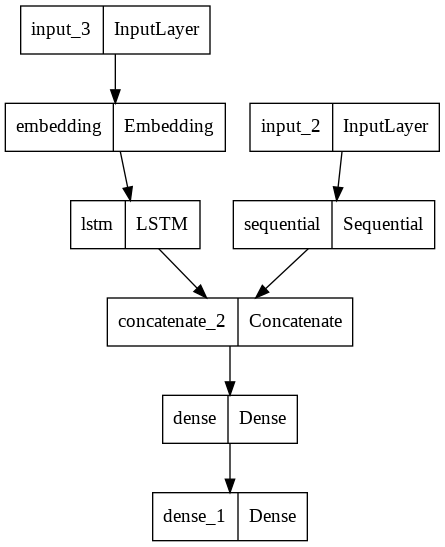

In [45]:
# You should not need to modify this.
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [46]:
# You should not nee to modify this.
# Retrieve a batch of data from your train dataset
activations_batch, questions_batch, answers_batch, paths_batch = next(iter(train_ds))

In [47]:
# Your code here

# Train them model repeatedly using model.train_on_batch
# Verify the loss goes to zero after +/- 100 training steps.
# If it does not, now would be a great time to debug 
# before proceeding further.

# e.g.
# metrics = model.train_on_batch ....
# metrics is a list (loss is metrics[0], accuracy is metrics[1])
for i in range(100):
  metrics = model.train_on_batch([activations_batch, questions_batch],answers_batch)
  # print(metrics[0])
  # print(metrics[1])

#metrics = model.train_on_batch([activations_batch, questions_batch],answers_batch)

In [48]:
print(metrics)

[1.3389080777415074e-05, 1.0]


In [49]:
# You should not need to modify this, but you will want to 
# carefully inspect the output.
for prediction, answer in zip(model.predict(x=[activations_batch, questions_batch]), answers_batch):
  print(prediction, answer.numpy())

1/1 [==============================] - 0s 437ms/step
[0.9999975] 1.0
[3.5952637e-06] 0.0
[5.9600875e-06] 0.0
[0.999997] 1.0
[8.2437255e-06] 0.0
[1.9244575e-05] 0.0
[1.1860116e-05] 0.0
[0.9999864] 1.0
[2.0641644e-06] 0.0
[1.4463836e-05] 0.0
[0.9999933] 1.0
[6.468797e-06] 0.0
[2.7525175e-06] 0.0
[0.99998975] 1.0
[4.0762705e-05] 0.0
[0.99999344] 1.0
[0.99998987] 1.0
[0.999969] 1.0
[1.7682307e-05] 0.0
[6.0090792e-06] 0.0
[0.99996054] 1.0
[0.9999982] 1.0
[1.0086757e-06] 0.0
[0.9999877] 1.0
[0.9999944] 1.0
[0.9999912] 1.0
[0.9999926] 1.0
[1.0916823e-05] 0.0
[6.777271e-05] 0.0
[1.3422715e-05] 0.0
[0.99997306] 1.0
[8.521792e-06] 0.0


In [50]:
# If you would like to save checkpoints in drive (optional), you can uncomment
# the code below. Otherwise, this notebook will save checkpoints in Colab,
# which is okay for this assignment.

## Mount Google Drive
# from google.colab import drive
# drive.mount('/gdrive')
# drive_root = '/gdrive/My Drive/'

## Save checkpoints to Colab by default
drive_root = "/content/"

In [51]:
# This code will save checkpoints in drive.
# Alternatively, you can modify it to save
# checkpoints in Colab (these will not persist if your instance is terminated,
# but you can manually download them if you like).
checkpoint_dir = os.path.join(drive_root, "checkpoints")
checkpoint_dir = os.path.join(checkpoint_dir, "hw4")

# Used for formatting
checkpoint_path = os.path.join(checkpoint_dir, "cp-{epoch:08d}.ckpt")

In [52]:
# You should not need to modify this code.
latest = tf.train.latest_checkpoint(checkpoint_dir)
if latest != None:
  print("Loading weights from", latest)
  model.load_weights(latest)
else:
  print("Checkpoint not found. Starting from scratch")

Checkpoint not found. Starting from scratch


In [53]:
# Utilities to help us record metrics.
# You should not need to modify this code
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

val_loss = tf.keras.metrics.BinaryCrossentropy(name='val_loss')
val_accuracy = tf.keras.metrics.BinaryAccuracy(name='val_accuracy')

In [54]:
# You should not need to modify this.
def evaluate(max_steps=None):
  steps = 0
  for activation_batch, question_batch, answer_batch, path_batch in val_ds:
    if max_steps != None and steps == max_steps:
      break
    predictions = model.predict(x=[activation_batch, question_batch])
    steps += 1 
    # Record metrics after each batch
    val_loss(answer_batch, predictions)
    val_accuracy(answer_batch, predictions)

In [55]:
# Your code here
# Complete this cell (there are only a few parts to write)

# Used to track loss and accuracy as we go
# You should not need to modify these
train_loss_history, train_acc_history = [], []
val_loss_history, val_acc_history = [], []

epochs = 30 # Your code here

# Training loop
for epoch in range(epochs):

  start = time.time()

  # Train for one epoch
  for activation_batch, question_batch, answer_batch, path_batch in train_ds:
    result = model.train_on_batch(x=[activation_batch, question_batch], y=answer_batch)

    # Record metrics after each batch
    train_loss(result[0])
    train_accuracy(result[1])

  # Evaluate for a few steps
  evaluate(max_steps=100)

  # Print progress
  # You should not need to modify this.
  template = 'Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Val Loss {:.2f}, Val Accuracy {:.2f}, Time: {:.1f} secs'
  print(template.format(epoch,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        val_loss.result(),
                        val_accuracy.result() * 100,
                        time.time() - start))
  
  # Record history
  train_loss_history.append(train_loss.result())
  train_acc_history.append(train_accuracy.result() * 100)
  val_loss_history.append(val_loss.result())
  val_acc_history.append(val_accuracy.result() * 100)

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()

  # Your code here
  # Save a checkpoint after each epoch
  print("Saving weights")
  # model.save_weights ...
  model.save_weights(checkpoint_path)

1/1 [==============================] - 0s 32ms/step
Epoch 0, Loss: 0.74, Accuracy: 50.02, Val Loss 0.69, Val Accuracy 49.22, Time: 73.6 secs
Saving weights
1/1 [==============================] - 0s 28ms/step
Epoch 1, Loss: 0.69, Accuracy: 49.42, Val Loss 0.69, Val Accuracy 51.25, Time: 70.6 secs
Saving weights
1/1 [==============================] - 0s 26ms/step
Epoch 2, Loss: 0.69, Accuracy: 50.22, Val Loss 0.69, Val Accuracy 50.81, Time: 72.7 secs
Saving weights
1/1 [==============================] - 0s 34ms/step
Epoch 3, Loss: 0.69, Accuracy: 50.13, Val Loss 0.69, Val Accuracy 50.66, Time: 81.7 secs
Saving weights
1/1 [==============================] - 0s 51ms/step
Epoch 4, Loss: 0.69, Accuracy: 51.59, Val Loss 0.69, Val Accuracy 51.22, Time: 78.3 secs
Saving weights
1/1 [==============================] - 0s 27ms/step
Epoch 5, Loss: 0.69, Accuracy: 52.84, Val Loss 0.69, Val Accuracy 50.69, Time: 78.8 secs
Saving weights
1/1 [==============================] - 0s 34ms/step
Epoch 6, Los

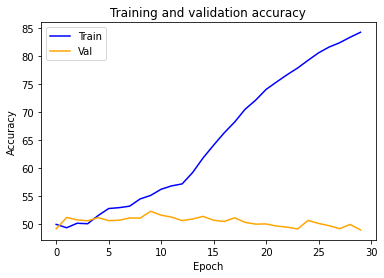

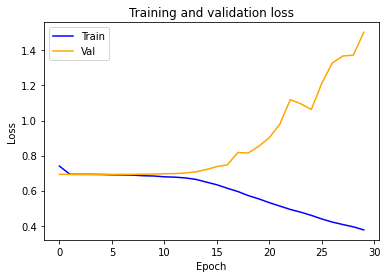

In [58]:
epochs = range(30)

plt.title('Training and validation accuracy')
plt.plot(epochs, train_acc_history, color = 'blue', label = 'Train')
plt.plot(epochs, val_acc_history, color = 'orange', label = 'Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, train_loss_history, color = 'blue', label = 'Train')
plt.plot(epochs, val_loss_history, color = 'orange', label = 'Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [59]:
# Restore the latest checkpoint
latest = tf.train.latest_checkpoint(checkpoint_dir)
assert latest != None
model.load_weights(latest)
print("loaded weights from", latest)

loaded weights from /content/checkpoints/hw4/cp-{epoch:08d}.ckpt


In [72]:
# Your code here
# Calculate accuracy on the test set
#model.predict()

my_iterator = iter(test_ds)
activations_batch, questions_batch, answers_batch, paths_batch = next(my_iterator)

total = 0
correct = 0

for prediction, answer in zip(model.predict(x=[activations_batch, questions_batch]), answers_batch):
  #print(answer.numpy())
  #print(prediction[0])
  if round(prediction[0]) == answer.numpy():
    #print("I am here")
    correct += 1
  total += 1

#print(prediction, answer.numpy())
# print(correct)
print(correct/total)

1/1 [==============================] - 0s 26ms/step
0.5
